C:\Users\Hp\AppData\Local\Temp\ipykernel_4772\4089015731.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


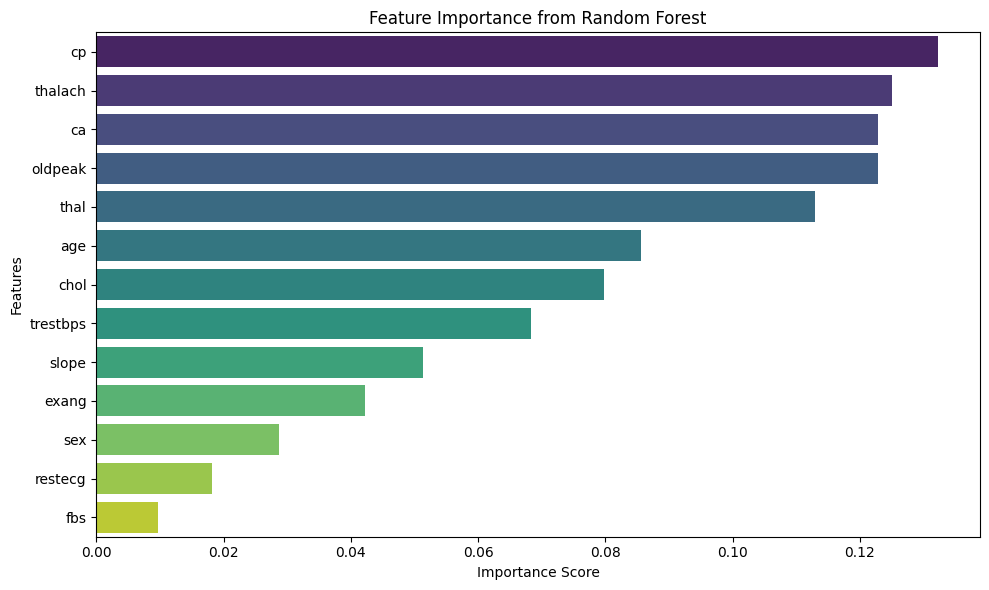

Top 4 features:
cp         0.132274
thalach    0.125039
ca         0.122912
oldpeak    0.122852
dtype: float64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("Dataset/heart.csv")  # Make sure the path is correct

# Encode categorical columns (if any)
df_encoded = df.copy()
for column in df_encoded.select_dtypes(include='object').columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Separate features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split data for model training (just to get importances)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print top features (you can adjust how many you want to see)
print("Top 4 features:")
print(importances.head(4))


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

# Load your dataset
# Assume the dataset is a CSV file. Replace 'your_data.csv' with the actual filename.
data = pd.read_csv('Dataset/heart.csv')

# Split into features (X) and target (y)
X = data.drop('target', axis=1)  # Replace 'target' with your actual target column
y = data['target']  # Target labels (e.g., 'disease' or 'no disease')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputer, scaler, and classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Handles missing values
    ('scaler', StandardScaler()),                  # Scales the features
    ('classifier', RandomForestClassifier())       # Classifier
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Save the trained pipeline (model)
joblib.dump(pipeline, 'heart_diseasemodel.pkl')

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Calculate other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 98.54%
Precision: 100.00%
Recall: 97.09%
F1 Score: 98.52%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [8]:
import pandas as pd
import numpy as np
import joblib

# Load the saved model pipeline
model = joblib.load('heart_model.pkl')

# List of all features that the model expects (make sure this matches the training set features)
all_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                'restecg', 'thalach', 'exang', 'oldpeak', 
                'slope', 'ca', 'thal']

# Function to get user input with support for blank inputs
def get_user_input():
    print("\nPlease enter the following information (press Enter to skip a value):")
    user_input = {}

    for feature in all_features:
        value = input(f"{feature}: ")
        if value.strip() == '':
            user_input[feature] = np.nan
        else:
            try:
                user_input[feature] = float(value)
            except ValueError:
                print(f"⚠️ Invalid input for {feature}. Setting as NaN.")
                user_input[feature] = np.nan

    return user_input

# Function to make predictions based on user input
def predict_with_user_input(user_input):
    # Convert the user input to a pandas DataFrame
    input_df = pd.DataFrame([user_input], columns=all_features)
    
    # Use the pipeline to predict (it handles imputation and scaling)
    prediction = model.predict(input_df)
    proba = model.predict_proba(input_df)[0]  # Get the probabilities for each class
    
    return {
        'prediction': int(prediction[0]),
        'probability_no_disease': float(proba[0]),
        'probability_disease': float(proba[1])
    }

if __name__ == "__main__":
    user_input = get_user_input()
    result = predict_with_user_input(user_input)

    print("\n🩺 Prediction Result:")
    print(f"Prediction: {'Disease' if result['prediction'] == 1 else 'No Disease'}")
    print(f"Probability of No Disease: {result['probability_no_disease'] * 100:.2f}%")
    print(f"Probability of Disease: {result['probability_disease'] * 100:.2f}%")



Please enter the following information (press Enter to skip a value):

🩺 Prediction Result:
Prediction: Disease
Probability of No Disease: 33.00%
Probability of Disease: 67.00%
